https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set(rc={"figure.figsize": (8, 4)})

### Common helper functions

In [4]:
def missing_data_total_percent(df):
    missing_total = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
    return (missing_total, missing_percent)

In [5]:
def scatter_plot(df, x_column, y_column, title, x_column_fun=lambda x: x):
    scatter_data = pd.concat([x_column_fun(df[x_column]), df[y_column]], axis=1)
    ax = scatter_data.plot.scatter(x=x_column, y=y_column, c='blue')
    ax.set_title(title)
    plt.show()

## Exploratory data analysis

In [6]:
df_train = pd.read_csv('data/train.csv')

In [7]:
print(df_train.shape)
print(df_train.columns)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [8]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1. Missing data analysis

In [9]:
missing_total, missing_percent = missing_data_total_percent(df_train)

missing_data_summary = pd.concat([missing_total, missing_percent], axis=1, keys=['Total', 'Percent'])
missing_data_summary.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [10]:
print("Columns with too much missing data:")
print(missing_percent[missing_percent > 0.9].index.values)

Columns with too much missing data:
['PoolQC' 'MiscFeature' 'Alley']


#### Numerical data

In [11]:
df_train.select_dtypes(include='number').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
df_train_num_vars = df_train[df_train.select_dtypes(include='number').columns]
missing_num_total, missing_num_percent = missing_data_total_percent(df_train_num_vars)
num_missing_data = pd.concat([missing_num_total, missing_num_percent], axis=1, keys=['Total', 'Percent'])
num_missing_data.head(5)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
BsmtFinSF1,0,0.000000
LowQualFinSF,0,0.000000


#### Numerical features where mean/median doesn't make sense 

In [13]:
['LotFrontage', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath',
 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars']

['LotFrontage',
 'MasVnrArea',
 'BsmtHalfBath',
 'BsmtFullBath',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars']

### 2. Correlation 

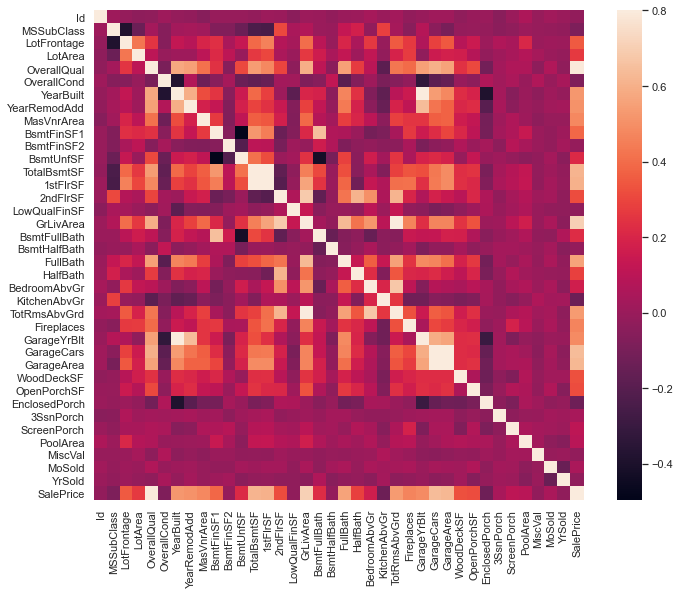

In [14]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### 3. Target variable analysis

In [15]:
target_var = df_train['SalePrice']

In [16]:
target_var.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.8828757597682129


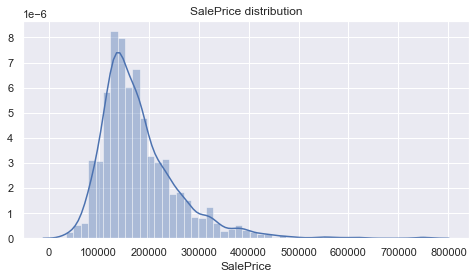

In [17]:
ax = sns.distplot(target_var)
ax.set_title('SalePrice distribution')
print("Skewness: {}".format(target_var.skew()))

Skewness: 0.12133506220520406


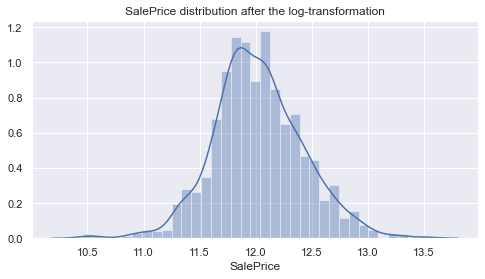

In [18]:
target_var_log = np.log(target_var)
ax = sns.distplot(target_var_log)
ax.set_title('SalePrice distribution after the log-transformation')
print("Skewness: {}".format(target_var_log.skew()))

### 4. Outliers analysis

In [19]:
df_train.skew().sort_values(ascending=False)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.197633
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
G

In [20]:
# Looking for outliers.
# See https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

##### GrLivArea

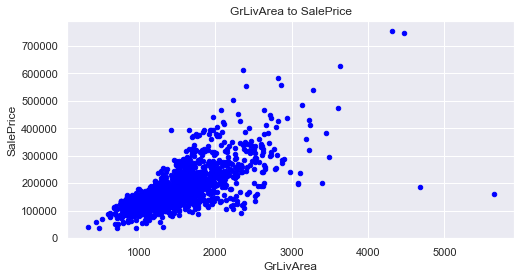

Skewness: 1.3665603560164552


In [21]:
x = 'GrLivArea'
y = 'SalePrice'
scatter_plot(df_train, x, y, "{} to {}".format(x, y))
print('Skewness:', df_train[x].skew())

In [37]:
print('Outliers:')
df_train[df_train['GrLivArea'] > 4000][['Id','GrLivArea']]

Outliers:


,Id,GrLivArea
523,524,4676
691,692,4316
1182,1183,4476
1298,1299,5642


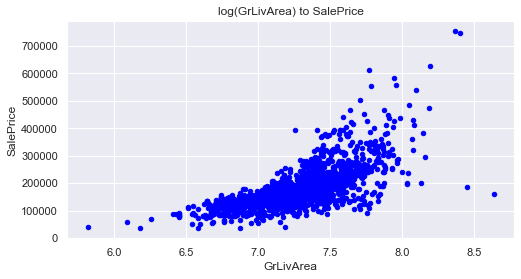

Skewness: -0.006140253486287281


In [23]:
# log-transformed
x = 'GrLivArea'
y = 'SalePrice'
scatter_plot(df_train, x, y, "log({}) to {}".format(x, y), np.log1p)
print('Skewness:', np.log1p(df_train[x]).skew())

##### LotArea

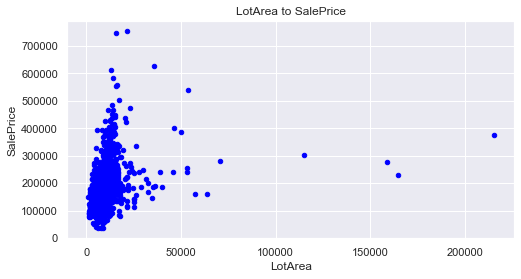

Skewness: 12.19763286238694


In [24]:
x = 'LotArea'
y = 'SalePrice'
scatter_plot(df_train, x, y, "{} to {}".format(x, y))
print('Skewness:', df_train[x].skew())

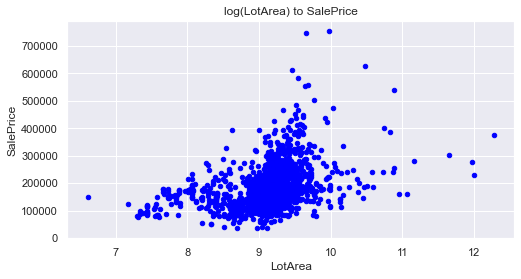

Skewness: -0.20119037040012835


In [25]:
# log-transformed
x = 'LotArea'
y = 'SalePrice'
scatter_plot(df_train, x, y, "log({}) to {}".format(x, y), np.log1p)
print('Skewness:', np.log1p(df_train[x]).skew())

##### MasVnrArea

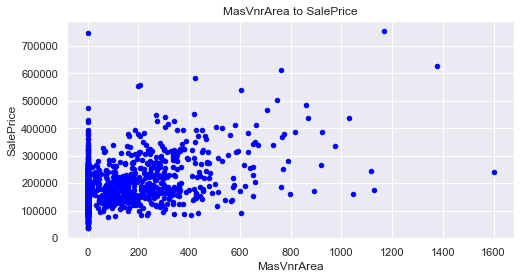

Skewness: 2.669084210182863


In [26]:
x = 'MasVnrArea'
y = 'SalePrice'
scatter_plot(df_train, x, y, "{} to {}".format(x, y))
print('Skewness:', df_train[x].skew())

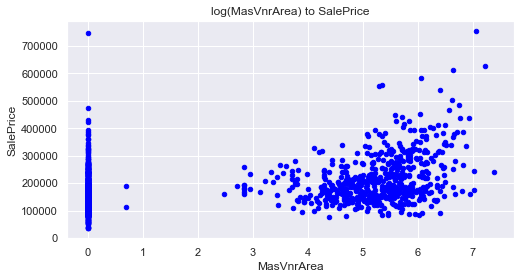

Skewness: 0.4944181850732156


In [27]:
# log-transformed
x = 'MasVnrArea'
y = 'SalePrice'
scatter_plot(df_train, x, y, "log({}) to {}".format(x, y), np.log1p)
print('Skewness:', np.log1p(df_train[x]).skew())

##### 1stFlrSF

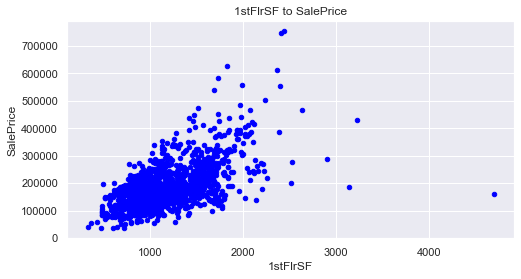

Skewness: 1.3767566220336365


In [28]:
x = '1stFlrSF'
y = 'SalePrice'
scatter_plot(df_train, x, y, "{} to {}".format(x, y))
print('Skewness:', df_train[x].skew())

###### 2ndFlrSF

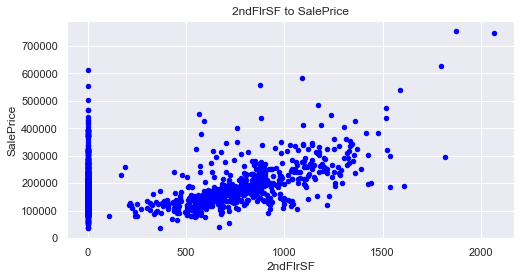

Skewness: 0.8130298163023265


In [29]:
x = '2ndFlrSF'
y = 'SalePrice'
scatter_plot(df_train, x, y, "{} to {}".format(x, y))
print('Skewness:', df_train[x].skew())

###### WoodDeckSF

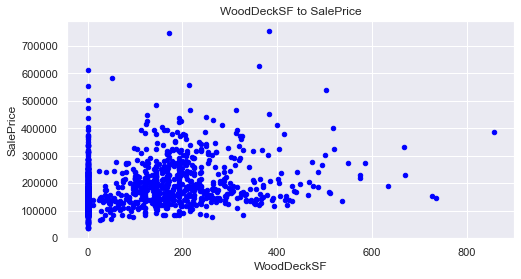

Skewness: 1.5413757571931312


In [30]:
x = 'WoodDeckSF'
y = 'SalePrice'
scatter_plot(df_train, x, y, "{} to {}".format(x, y))
print('Skewness:', df_train[x].skew())

###### OpenPorchSF

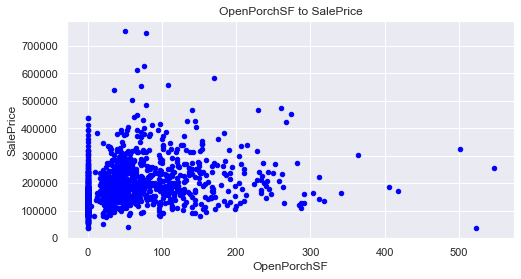

Skewness: 2.3643417403694404


In [31]:
x = 'OpenPorchSF'
y = 'SalePrice'
scatter_plot(df_train, x, y, "{} to {}".format(x, y))
print('Skewness:', df_train[x].skew())

###### PoolArea

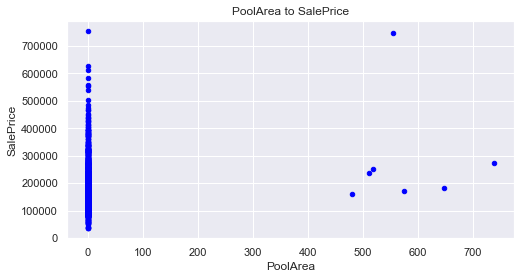

Skewness: 14.828373640750588


In [32]:
x = 'PoolArea'
y = 'SalePrice'
scatter_plot(df_train, x, y, "{} to {}".format(x, y))
print('Skewness:', df_train[x].skew())

###### TotalBsmtSF

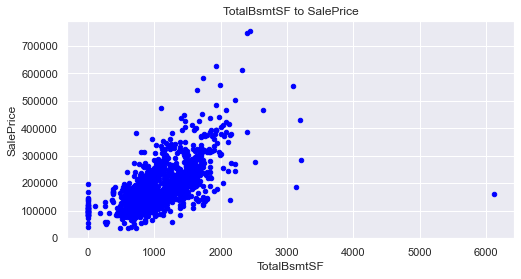

Skewness: 1.5242545490627664


In [33]:
x = 'TotalBsmtSF'
y = 'SalePrice'
scatter_plot(df_train, x, y, "{} to {}".format(x, y))
print('Skewness:', df_train[x].skew())

###### BsmtFinSF1

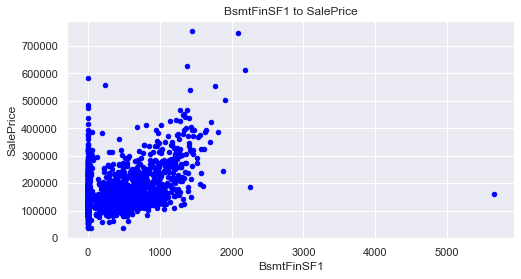

Skewness: 1.685503071910789


In [34]:
x = 'BsmtFinSF1'
y = 'SalePrice'
scatter_plot(df_train, x, y, "{} to {}".format(x, y))
print('Skewness:', df_train[x].skew())

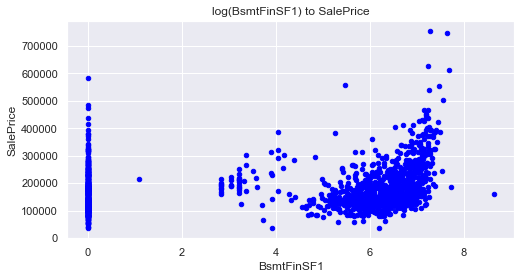

Skewness: -0.618409817855514


In [35]:
# log-transformed
x = 'BsmtFinSF1'
y = 'SalePrice'
scatter_plot(df_train, x, y, "log({}) to {}".format(x, y), np.log1p)
print('Skewness:', np.log1p(df_train[x]).skew())

Text(0.5, 0, 'log(BsmtFinSF1)')

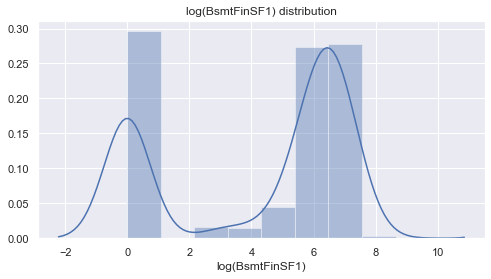

In [36]:
ax = sns.distplot(np.log1p(df_train['BsmtFinSF1']))
ax.set_title('log(BsmtFinSF1) distribution')
ax.set_xlabel('log(BsmtFinSF1)')

# бимодальное распределение